<a href="https://colab.research.google.com/github/Maki1502/Sieci-neuronowe-listy/blob/main/lista_1_zad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

##Obróbka danych

In [ ]:
df_test = pd.read_table('/content/drive/MyDrive/Sieci pliki/drugsComTest_raw.tsv')
df_train = pd.read_table('/content/drive/MyDrive/Sieci pliki/drugsComTrain_raw.tsv')
print(df_test)
print(df_train)

       Unnamed: 0         drugName                     condition  \
0          163740      Mirtazapine                    Depression   
1          206473       Mesalamine  Crohn's Disease, Maintenance   
2          159672          Bactrim       Urinary Tract Infection   
3           39293         Contrave                   Weight Loss   
4           97768  Cyclafem 1 / 35                 Birth Control   
...           ...              ...                           ...   
53761      159999        Tamoxifen     Breast Cancer, Prevention   
53762      140714     Escitalopram                       Anxiety   
53763      130945   Levonorgestrel                 Birth Control   
53764       47656       Tapentadol                          Pain   
53765      113712        Arthrotec                      Sciatica   

                                                  review  rating  \
0      "I&#039;ve tried a few antidepressants over th...    10.0   
1      "My son has Crohn&#039;s disease and has

##Encoder

Dane treningowe

In [ ]:
en_drug_train = preprocessing.LabelEncoder()
en_con_train = preprocessing.LabelEncoder()

en_drug_train.fit(df_train['drugName'])
drug_val_train = en_drug_train.transform(df_train['drugName'])

en_con_train.fit(df_train['condition'])
con_val_train = en_con_train.transform(df_train['condition'])

Train data
Drugs before: ['Valsartan', 'Guanfacine', 'Lybrel', 'Ortho Evra', 'Buprenorphine / naloxone']
Drugs after: [3203 1431 1854 2285  516]
Conditions before: ['Left Ventricular Dysfunction', 'ADHD', 'Birth Control', 'Birth Control', 'Opiate Dependence']
Conditions after: [466  73 165 165 574]
Test data
Drugs before: ['Mirtazapine', 'Mesalamine', 'Bactrim', 'Contrave', 'Cyclafem 1 / 35']
Drugs after: [1561 1489  294  593  622]
Conditions before: ['Depression', "Crohn's Disease, Maintenance", 'Urinary Tract Infection', 'Weight Loss', 'Birth Control']
Conditions after: [201 185 656 676 122]


Dane testowe

In [ ]:
en_drug_test = preprocessing.LabelEncoder()
en_con_test = preprocessing.LabelEncoder()

en_drug_test.fit(df_test['drugName'])
drug_val_test = en_drug_test.transform(df_test['drugName'])

en_con_test.fit(df_test['condition'])
con_val_test = en_con_test.transform(df_test['condition'])

In [ ]:
df_test['drugName'] = en_drug_test.transform(df_test['drugName'])
df_test['condition'] = en_con_test.transform(df_test['condition'])
print(df_test.head(10))
print(df_test.describe())

df_train['drugName'] = en_drug_train.transform(df_train['drugName'])
df_train['condition'] = en_con_train.transform(df_train['condition'])
print(df_train.head(10))
print(df_train.describe())

   Unnamed: 0  drugName  condition  \
0      163740      1561        201   
1      206473      1489        185   
2      159672       294        656   
3       39293       593        676   
4       97768       622        122   
5      208087      2624        365   
6      215892       595        122   
7      169852       150        403   
8       23295      1500        459   
9       71428      1351        122   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   
5  "4 days in on first 2 weeks.  Using on arms an...     4.0   
6  "I&#039;ve had the copper coil for about 3 mon...     6.0   
7  "This has been great for me. I&#039;ve been on...     9.0   
8  "I

##Dane

In [ ]:
#opis danych
print(df_train.describe())

#dystrybucja leków i chorób
print(df_train.groupby('drugName').size())
print(df_train.groupby('condition').size())

          Unnamed: 0       drugName      condition         rating  \
count  161297.000000  161297.000000  161297.000000  161297.000000   
mean   115923.585305    1706.315610     361.044049       6.994377   
std     67004.445170     942.790948     238.681788       3.272329   
min         2.000000       0.000000       0.000000       1.000000   
25%     58063.000000     988.000000     165.000000       5.000000   
50%    115744.000000    1748.000000     262.000000       8.000000   
75%    173776.000000    2449.000000     563.000000      10.000000   
max    232291.000000    3435.000000     884.000000      10.000000   

         usefulCount  
count  161297.000000  
mean       28.004755  
std        36.403742  
min         0.000000  
25%         6.000000  
50%        16.000000  
75%        36.000000  
max      1291.000000  
drugName
0        1
1        1
2       52
3        1
4       19
        ..
3431    17
3432     2
3433     1
3434    51
3435     3
Length: 3436, dtype: int64
condition
0   

##Wykresy

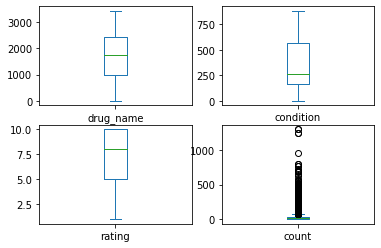

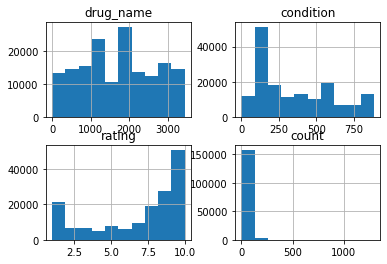

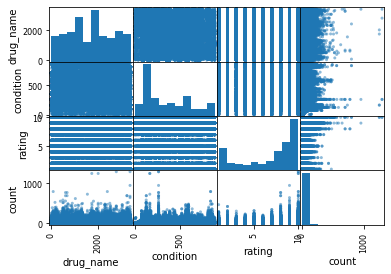

In [ ]:
df_train.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

df_train.hist()
plt.show()

scatter_matrix(df_train)
plt.show()

##Ocena algorytmów

In [ ]:
seed = 7
scoring = 'accuracy'

Modele

In [ ]:
models = []
#models.append(('LR', LogisticRegression(solver='sag')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))

In [ ]:
x_train = df_train[['Unnamed: 0', 'condition', 'rating', 'usefulCount']].values
y_train = df_train['drugName'].values
print('x')
print(x_train)
print('y')
print(y_train)

x
[[2.06461e+05 4.66000e+02 9.00000e+00 2.70000e+01]
 [9.52600e+04 7.30000e+01 8.00000e+00 1.92000e+02]
 [9.27030e+04 1.65000e+02 5.00000e+00 1.70000e+01]
 ...
 [1.87382e+05 7.01000e+02 2.00000e+00 3.50000e+01]
 [4.71280e+04 8.12000e+02 1.00000e+01 7.90000e+01]
 [2.15220e+05 2.33000e+02 9.00000e+00 1.16000e+02]]
y
[3203 1431 1854 ... 2279 3028 1840]


In [ ]:
x_test = df_test[['Unnamed: 0', 'condition', 'rating', 'usefulCount']].values
y_test = df_test['drugName'].values
print('x')
print(x_test)
print('y')
print(y_test)

x
[[1.63740e+05 2.01000e+02 1.00000e+01 2.20000e+01]
 [2.06473e+05 1.85000e+02 8.00000e+00 1.70000e+01]
 [1.59672e+05 6.56000e+02 9.00000e+00 3.00000e+00]
 ...
 [1.30945e+05 1.22000e+02 8.00000e+00 7.00000e+00]
 [4.76560e+04 4.78000e+02 1.00000e+00 2.00000e+01]
 [1.13712e+05 5.77000e+02 9.00000e+00 4.60000e+01]]
y
[1561 1489  294 ... 1349 2268  217]


In [ ]:
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LDA: 0.131583 (0.001851)
KNN: 0.959807 (0.001808)
CART: 0.975182 (0.001371)
NB: 0.718104 (0.007201)


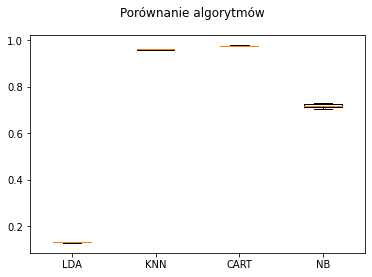

In [ ]:
fig = plt.figure()
fig.suptitle('Porównanie algorytmów')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.00013019380277498792
[[0 0 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00       147
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        47
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        34
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00       111
          17       0.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
